# Transformando Estratégias em Ações Personalizadas no E-Commerce através da Clusterização de Clientes

## Introdução
No cenário dinâmico do comércio eletrônico, a capacidade de compreender e atender às necessidades específicas dos clientes desempenha um papel crucial no sucesso de qualquer empreendimento. Nesse contexto, surge a necessidade de desenvolver uma abordagem estratégica e eficaz para segmentar a base de clientes, visando a personalização das interações e aprimoramento das estratégias de marketing.

## Objetivos
A ideia é extrair insights valiosos a partir dos dados disponíveis, categorizando os clientes em grupos específicos. Essa abordagem permitirá a personalização precisa das campanhas de marketing, destacando-se pela entrega de conteúdo relevante e direcionado.

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

## Carregando os dados

In [2]:
# Carregando o dataset.
df = pd.read_csv('Dados/dados_e-commerce.csv')

# Verificando as informações do dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [3]:
# Verificando as 5 primeiras linhas do dataset.
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


## Análise Exploratória dos Dados

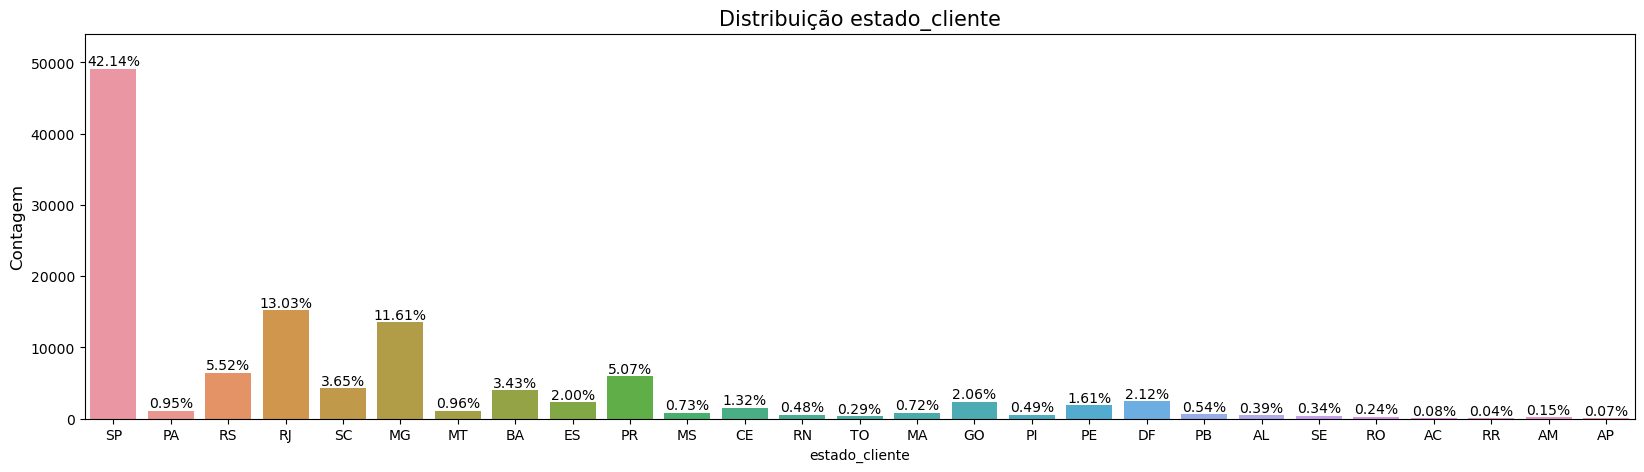

In [4]:
# Gerando uma função para plotar gráficos de barras com porcentagem.
def plot_perc(st, dados):
    plt.figure(figsize=(20, 5))
    g = sns.countplot(x=st, data=dados, orient='h')
    g.set_title(f'Distribuição {st}', fontsize=15)
    g.set_ylabel('Contagem', fontsize=12)

    # Colocando as labels
    size = []

    for p in g.patches:
        height = p.get_height()
        size.append(height)
        g.text(p.get_x()+p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/len(dados)*100),
               ha="center", 
               va='bottom',
               fontsize=10)
        
    g.set_ylim(0, max(size) * 1.1)

plot_perc('estado_cliente', df)

Ao examinar a distribuição percentual dos clientes por estado, nota-se que o estado de São Paulo (SP) apresenta a maior concentração de clientes, indicando uma significativa representação no total. Na sequência, destacam-se os estados do Rio de Janeiro (RJ) e Minas Gerais (MG), que também exibem uma presença considerável na distribuição de clientes.

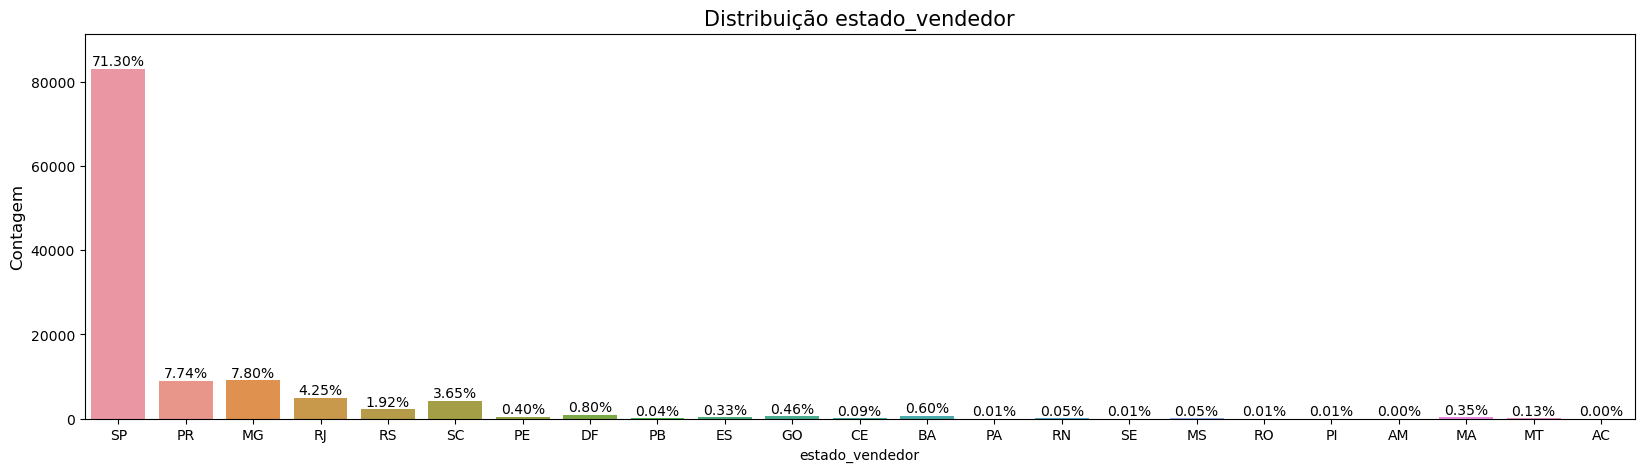

In [5]:
plot_perc('estado_vendedor', df)

Semelhante ao gráfico anterior, há maior concentração de vendedores no estado de São Paulo (SP). Na sequência, destacam-se os estados do Minas Gerais (MG) e Paraná (PR).

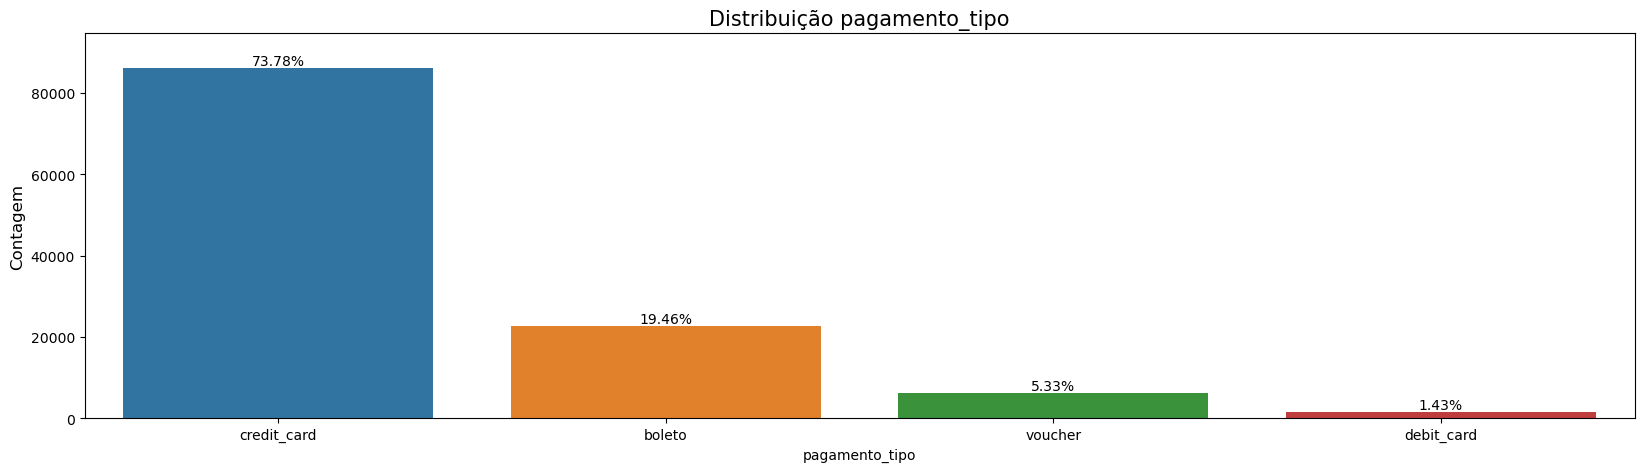

In [6]:
plot_perc('pagamento_tipo', df)

Quanto ao pagamento, o método de pagamento mais utilizado é o pagamento com cartão de crédito e boleto. 

Essa análise é interessante pois podemos aumentar as promoções para pagamento à vista, para que a gente possa aumentar a quantidade de pagamentos com boleto ou cartão de crédito, aumentando inclusive a segurança com os pagamentos em boleto, diminuindo os casos de fraude por cartão de crédito.

## Definindo modelo RFM

- **Recência:** o quão recentemente um cliente fez uma compra.
- **Frequência:** a frequência que um cliente faz uma compra.
- **Monetariedade:** o quanto um cliente gasta nas suas compras.

### Recência

In [7]:
# Criando um dataframe com apenas as colunas necessárias.
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [8]:
# Agrupando as informações por cliente.
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()

# Criando as colunas.
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra']

# Convertendo a coluna para datetime.
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

# Criando a coluna de recência.
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [9]:
# Juntando os dataframes.
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente', 'Recencia']], on='id_unico_cliente')

### Calculando soma dos quadrados intra-cluster

In [10]:
# Criando uma função que calcula a wcss (soma dos quadrados intra-cluster).
def calcular_wcss(data):
    wcss = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss


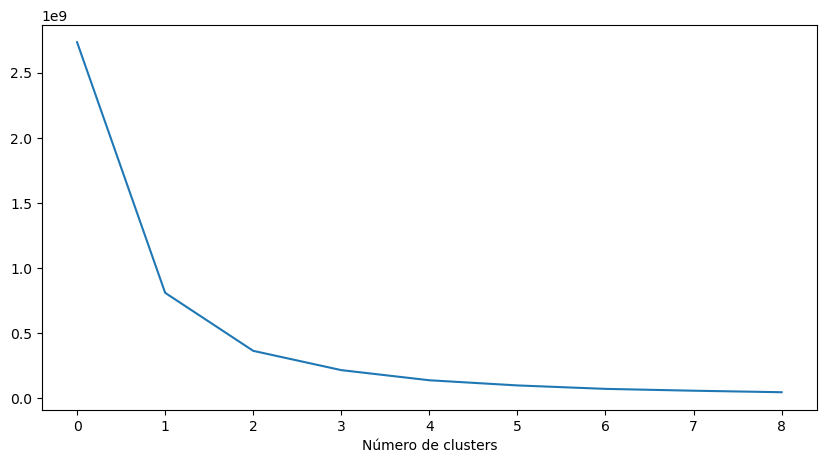

In [11]:
# Criando um dataframe com a coluna Recencia.
df_recencia = df_usuario[['Recencia']]

# Calculando a soma dos quadrados.
soma_quadrados = calcular_wcss(df_recencia)

# Plotando o gráfico.
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()


A partir do gráfico gerado, podemos notar que a partir de 4 clusters, o valor não sofre muitas alterações.
Para ter certeza, aplicamos o cálculo matemático conforme abaixo.

In [12]:
import math

def num_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancia = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    
    return distancia.index(max(distancia)) + 2

# Calculando o número ótimo de clusters.
n = num_otimo_clusters(soma_quadrados)
print(f'Número ótimo de clusters: {n}')

Número ótimo de clusters: 4


## Clusterizando a Recência

In [13]:
# Instanciando o KMeans.
kmeans = KMeans(n_clusters = 4)

# Criando a coluna RecenciaCluster com os clusters.
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)

In [14]:
#função para ordenar o número de clusters 
def ordenar_cluster(cluster_nome, target_nome, df,ascending):
    novo_nome = 'novo' + cluster_nome
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome,
                                                                     ascending=ascending).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df,agrupado_por_cluster_ordenado[[cluster_nome,'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns={"index":cluster_nome})
    return df_final

df_usuario = ordenar_cluster('RecenciaCluster', 'Recencia',df_usuario,False)
df_usuario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0
...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12,3
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41,3
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41,3
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36,3


## Clusterizando a Frequência

In [15]:
# Criando um dataframe com a coluna Frequencia.
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()

# Criando as colunas.
df_frequencia.columns = ['id_unico_cliente', 'Frequencia']

# Juntando os dataframes.
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [16]:
# Criando dataframe com a coluna Frequencia.
df_frequencia = df_usuario[['Frequencia']]

# Instanciando o KMeans.
kmeans = KMeans(n_clusters=4)

# Criando a coluna FrequenciaCluster com os clusters.
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)

# Ordenando os clusters.
df_usuario = ordenar_cluster('FrequenciaCluster', 'Frequencia',df_usuario,True)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


## Clusterizando a Receita

In [17]:
# Criando um dataframe com a coluna Receita.
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()

# Criando as colunas.
df_receita.columns = ['id_unico_cliente', 'Receita']

# Juntando os dataframes.
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [18]:
# Criando dataframe com a coluna Receita.
df_pagamento = df_usuario[['Receita']]

# Instanciando o KMeans.
kmeans = KMeans(n_clusters=4)

# Criando a coluna ReceitaCluster com os clusters.
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

# Ordenando os clusters.
df_usuario = ordenar_cluster('ReceitaCluster', 'Receita', df_usuario,True)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


## Segmentação por pontuação

Após clusterização de RFM, criamos um dataframe final com as colunas que utilizaremos para gerar uma coluna de pontuação.

In [19]:
df_final = df_usuario[['id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia', 'FrequenciaCluster', 'Receita', 'ReceitaCluster']]
df_final

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0
...,...,...,...,...,...,...,...
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


Abaixo, criamos uma coluna de pontuação, no qual somamos os clusters de RFM.
A pontuação mínima é 0 e a máxima é 7.

In [20]:
df_final['Pontuacao'] = df_final['RecenciaCluster'] + df_final['FrequenciaCluster'] + df_final['ReceitaCluster']
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0


In [21]:
print(f'Pontuação mínima: {df_final.Pontuacao.min()}')
print(f'Pontuação máxima: {df_final.Pontuacao.max()}')

Pontuação mínima: 0
Pontuação máxima: 7


Segmentamos os clientes em 4 tipos:
- Se pontuação for menor que 1: Inativo
- Se pontuação for maior ou igual a 1: Business 
- Se pontuação for maior ou igual a 3: Master
- Se pontuação for mario ou igual a 5: Premium

Com os requisitos acima, geramos a coluna Segmento.

Por fim, salvamos o dataframe final em formato CSV para analisarmos as features.

In [22]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >= 1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao'] >= 3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao'] >= 5, 'Segmento'] = 'Premium'

df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0,Inativo
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0,Inativo
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0,Inativo
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0,Inativo
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0,Inativo


In [23]:
df_final.to_csv('Dados/RFM.csv', index=False)

## Análise da segmentação

In [24]:
# Função para plotar gráfico de dispersão.
def plot_segmento(x, y, data):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=x, y=y, data=data, hue='Segmento', palette='Set2', sizes=(10, 200), size_order=['Premium', 'Master', 'Business', 'Inativo'])
    plt.title('Segmentação de clientes', fontsize=15)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.show()

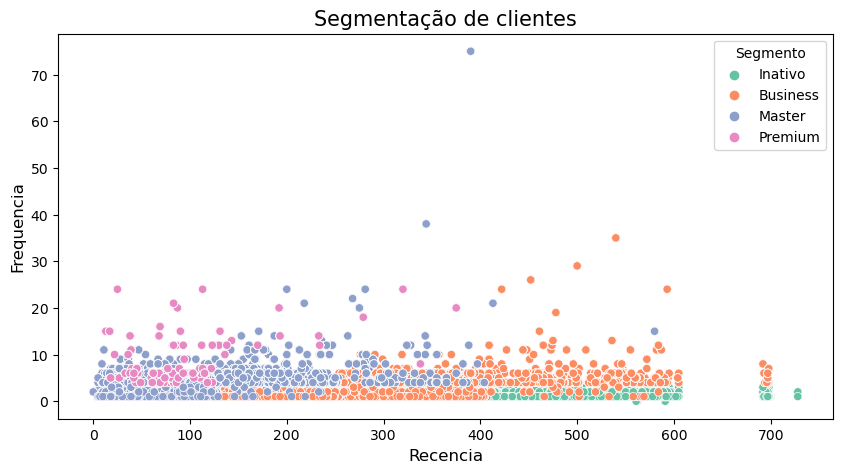

In [25]:
plot_segmento('Recencia', 'Frequencia', df_final)

 Com base na recência, notamos que os clientes com maior frequência e menor recência são os clientes premium, enquanto os clientes que não compram a 700 dias são considerados como inativos. Ainda, podemos observar também que tem cliente master que está a muito tempo sem comprar. 

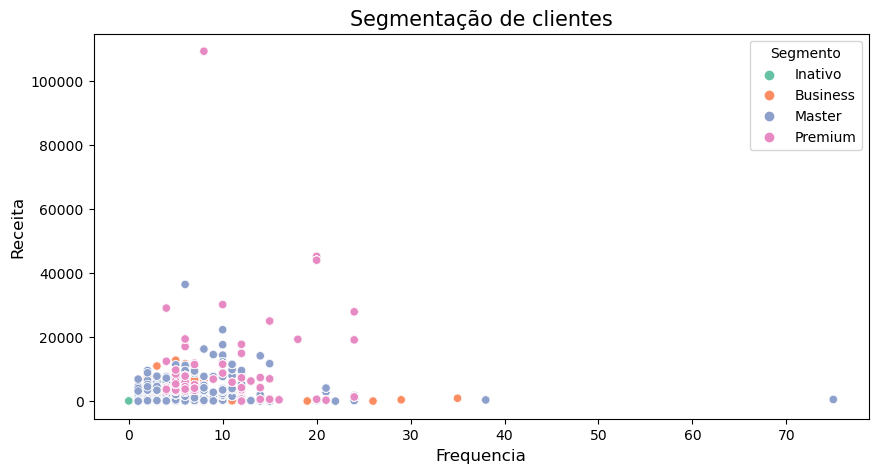

In [26]:
plot_segmento('Frequencia', 'Receita', df_final)

No gráfico acima, notamos que clientes que compram com muita frequência, mas valores pequenos, estão no master. Podemos notar que tem um ponto verde de cliente inativo, pois ele compra pouco e gasta pouco. Existem alguns pontos de clientes business, que são aqueles que compram não com tanta frequência assim e não gastam tanto.

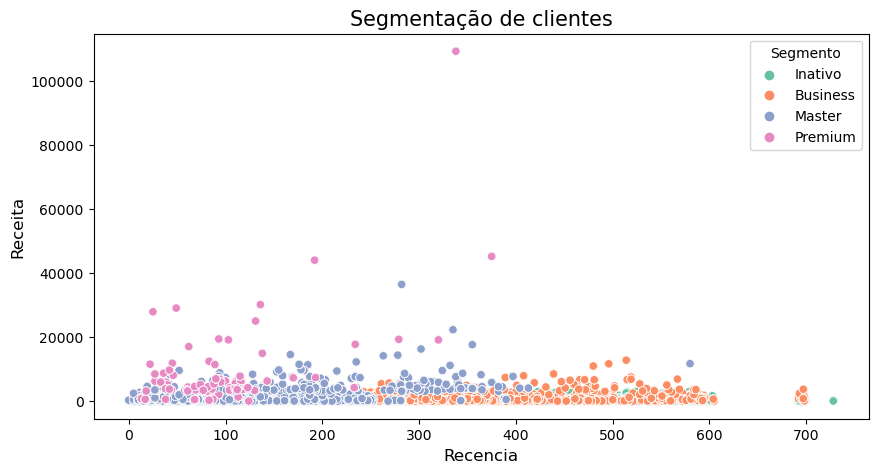

In [27]:
plot_segmento('Recencia', 'Receita', df_final)

O cliente que faz muito tempo que não compra e não comprou muito está no business, depois à medida que vai melhorando essa questão de recência vai virando master, e então a receita.

Text(0.5, 1.0, 'Distribuição dos segmentos')

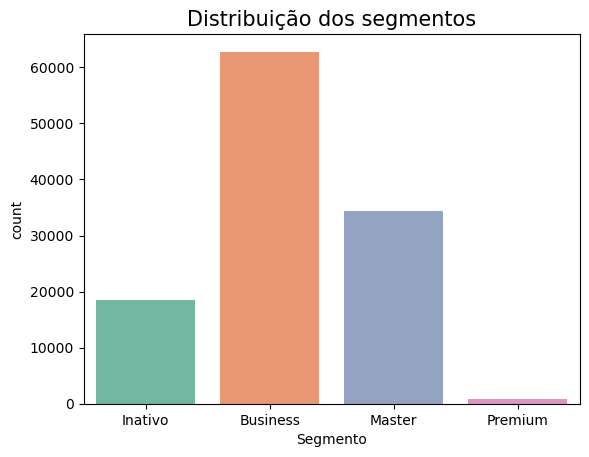

In [28]:
sns.countplot(x='Segmento', data=df_final, palette='Set2')
plt.title('Distribuição dos segmentos', fontsize=15)

Por fim, a maioria dos clientes são do segmento Business. Temos uma boa quantidade de clientes Masters e Inativos, são pouquíssimos clientes que pertencem a segmentação Premium. 

## Melhorando a segmentação

<h2>Tabela de Dados</h2>
   <table>
        <thead>
            <tr>
                <th>Segmentação</th>
                <th>Descrição</th>
                <th>Recência</th>
                <th>Frequência</th>
                <th>Valor Monetário</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Campeões</td>
                <td>Compraram recentemente, compram com frequência e gastam muito</td>
                <td>0</td>
                <td>3</td>
                <td>3</td>
            </tr>
            <tr>
                <td>Fiéis</td>
                <td>Gastam muito e respondem a promoções</td>
                <td>1</td>
                <td>3</td>
                <td>3</td>
            </tr>
            <tr>
                <td>Potencialmente fiéis - Tipo 1</td>
                <td>Compraram recentemente, mais de uma vez e gastaram uma boa quantia</td>
                <td>1</td>
                <td>2</td>
                <td>2</td>
            </tr>
            <tr>
                <td>Potencialmente fiéis - Tipo 2</td>
                <td>Compraram recentemente, poucas vezes e gastaram muito</td>
                <td>1</td>
                <td>1</td>
                <td>3</td>
            </tr>
            <tr>
                <td>Novos clientes</td>
                <td>Compraram recentemente, mas não compram com frequência</td>
                <td>0</td>
                <td>0</td>
                <td>0</td>
            </tr>
            <tr>
                <td>Promissores</td>
                <td>Compraram recentemente, mas não gastaram muito</td>
                <td>0</td>
                <td>1</td>
                <td>1</td>
            </tr>
            <tr>
                <td>Precisam de atenção</td>
                <td>Recência, frequência e valor monetário acima da média</td>
                <td>2</td>
                <td>2</td>
                <td>2</td>
            </tr>
            <tr>
                <td>Quase em risco</td>
                <td>Recência, frequência e valor monetário abaixo da média</td>
                <td>2</td>
                <td>1</td>
                <td>1</td>
            </tr>
            <tr>
                <td>De risco</td>
                <td>Gastaram muito, compraram muitas vezes, mas há muito tempo</td>
                <td>3</td>
                <td>2</td>
                <td>2</td>
            </tr>
            <tr>
                <td>Não pode perdê-los</td>
                <td>Compraram muito e com frequência, mas há muito tempo</td>
                <td>3</td>
                <td>3</td>
                <td>3</td>
            </tr>
            <tr>
                <td>Hibernando</td>
                <td>Compraram pouco, com baixa frequência e há muito tempo</td>
                <td>3</td>
                <td>1</td>
                <td>1</td>
            </tr>
            <tr>
                <td>Perdidos</td>
                <td>Recência, frequência e valores monetários baixos</td>
                <td>3</td>
                <td>0</td>
                <td>0</td>
            </tr>
        </tbody>
    </table>

In [29]:
df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Campeao'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Fiel'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Potencialmente Fiel - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Potencialmente Fiel - Tipo 2'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] = 'Novos'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] = 'Promissores'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Precisam Atencao'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Quase em Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] ='Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] ='Nao pode perder - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Hibernando'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] ='Perdidos'

In [30]:
def agrupar(p,q,r,segmento):
    df_final.loc[(df_final['RecenciaCluster']==p) & (df_final['FrequenciaCluster']==q) & (df_final['ReceitaCluster']==r),'Segmento'] = 'Segmento'

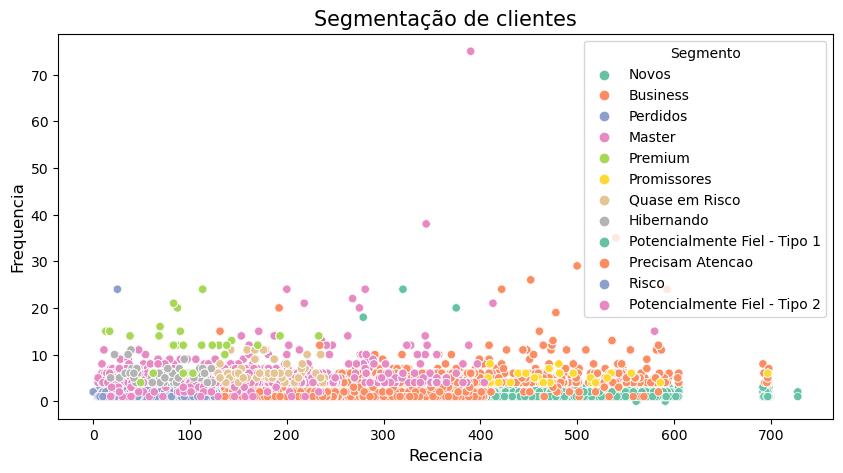

In [31]:
plot_segmento('Recencia', 'Frequencia', df_final)

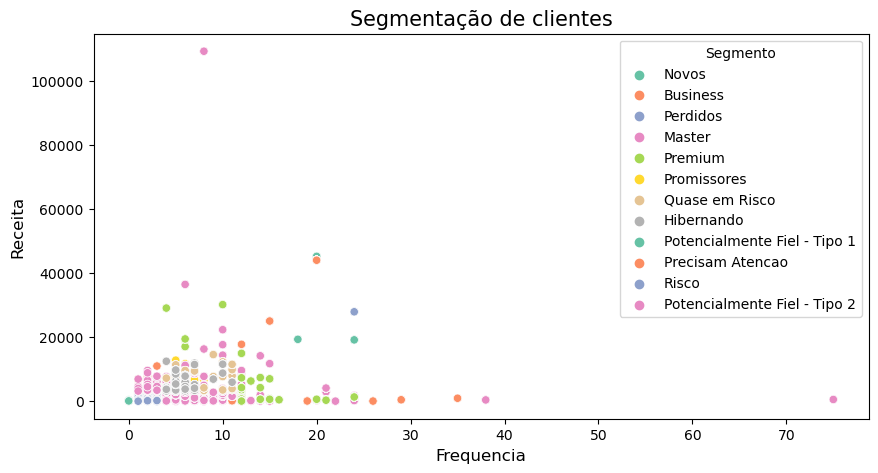

In [32]:
plot_segmento('Frequencia', 'Receita', df_final)

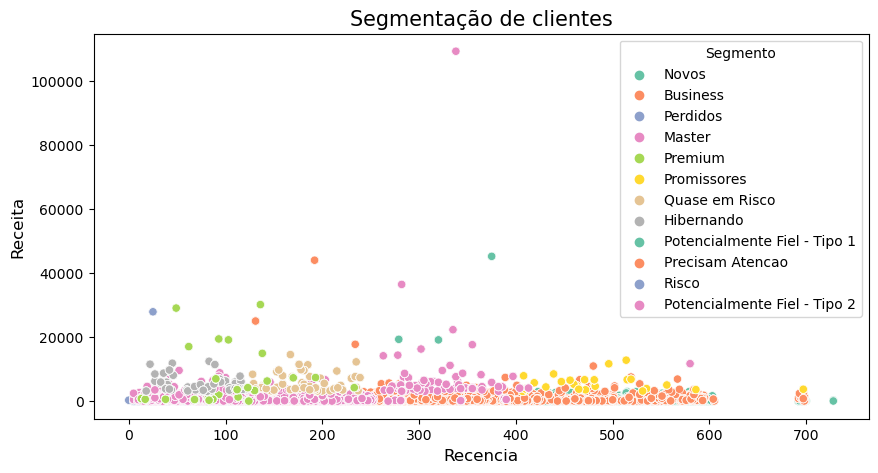

In [33]:
plot_segmento('Recencia', 'Receita', df_final)

## Possíveis soluções

- Recuperar os clientes inativos.
- Fornecer descontos especiais de frete aos 'Master'.
- Descontos especiais aos 'premium' e atendimento especializado.
- Para os cliente promissores que compram bastante com frequência, podemos oferecer recomendações para tornar um cliente fiel.
- Para os clientes que compravam com certa frequência e deixaram de comprar, podemos oferecer promoções para evitar que eles se tornarem clientes inativos.
- Para os clientes que gastam bastante, podemos oferecer um atendimento especializado ou indicação de um produto, uma vez que desconto não necessariamente impactarão esse tipo de perfil.
- Para os clientes leais que compram com frequência e gastam um valor razoável, podemos oferecer descontos, gerando campanhas de fidelidade.